In [ ]:
!wget https://raw.githubusercontent.com/marsgr6/r-scripts/master/notebooks/00_10_important_cont_dist_202410.ipynb

--2023-12-01 17:00:36--  https://raw.githubusercontent.com/marsgr6/r-scripts/master/notebooks/00_10_important_cont_dist_202410.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191141 (187K) [text/plain]
Saving to: ‘00_10_important_cont_dist_202410.ipynb’

00_10_important_con 100%[===================>] 186.66K  --.-KB/s    in 0.002s  

2023-12-01 17:00:36 (74.7 MB/s) - ‘00_10_important_cont_dist_202410.ipynb’ saved [191141/191141]



### Modeling and simulation

- Check the following [slides](https://udla.brightspace.com/d2l/lor/viewer/view_private.d2l?ou=217304&loIdentId=269)
  - What is a system?
  - What is a model?
  - What is a simulation?
  - What is the difference between deterministic and stochastic?
  - What are discrete and continuous variables?

### 1D Random Walk 

- Implement a 1D random walk (a particle move in a 1D space)
  - In one dimension the particle move **up or down** randomly with equal probability.
  - The walks occurs for a given **number of steps**. 

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/rwbarriers.png)

- There is a **reflecting barrier (green)**. If the particle collides with the reflecting barrier, the next step is up. 

- There is an **absorbing barrier (red)**. If the particle collides with the abasorbing barrier the walk ends. 
  - The particle disappears (dies). 

- **Enumerate:**
  - The input (independent) variables of the system. This is how you set up your system. 
  - The output (dependent) variables of the system. This is what you observe according to the system setup. 

- **What type of system are you modeling/observing?**

In [ ]:
# Start writing code here...
import numpy as np  # numerical computation (This is MATLAB in Python)
import matplotlib.pyplot as plt  # All graphs have to go through this
import pandas as pd  # manipulates data
import seaborn as sns  # easy to graph

### Uniform Distribution

- Uniform distribution $X\sim U(a,b)$
  - Where $a\leq x \leq b$

- PDF: $f(x; a, b) = \frac{1}{b-a}$

- Standard Uniform has $a=0, b=1$.

- https://en.wikipedia.org/wiki/Continuous_uniform_distribution

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Uniform_Distribution_PDF_SVG.svg/320px-Uniform_Distribution_PDF_SVG.svg.png)

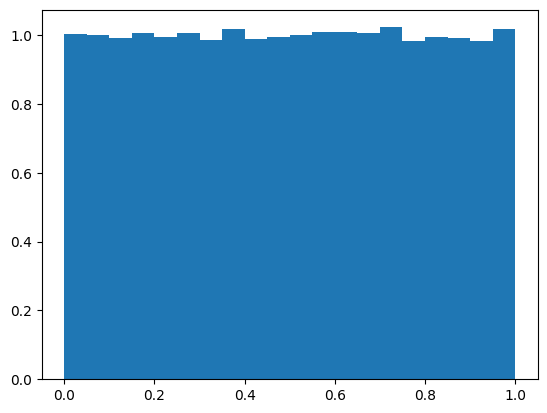

In [ ]:
# plot a histogram of a standard uniform distribution
# plot the PDF
X = np.random.random(size=100000)
plt.hist(X, bins=20, density=True);

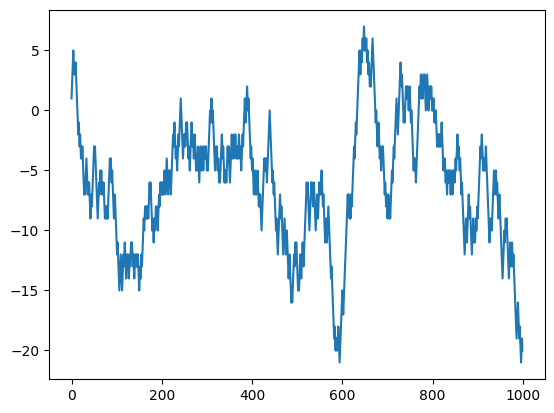

In [ ]:
# Implement a 1D random walk

plt.plot((2*(np.random.random(size=1000)*2).astype(int) - 1).cumsum())

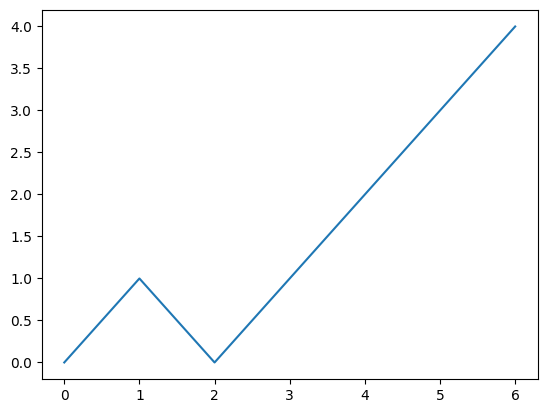

In [ ]:
# implement a random walk with an absorbing and a reflecting barrier
def make_walk(start, absorbing_barrier, reflecting_barrier=0):
    walk = [start]
    while True:
        if walk[-1]:
            walk += [walk[-1] + int(2*(np.random.random()))*2 - 1]
        else: walk += [walk[-1] + 1]
        if walk[-1] == absorbing_barrier: 
            return walk

start = 0
reflecting_barrier = 0
absorbing_barrier = 4

walk = make_walk(absorbing_barrier=4, start=0)
plt.plot(walk)

In [ ]:
# What is the average life of a particle by 1 simulation
len(walk) - 1  # average life

6

In [ ]:
# What is the average life of a particle by many simulation
sims = 100
walks = np.array([len(make_walk(absorbing_barrier=4, start=0)) - 1 for i in range(sims)])
walks.mean(), walks.min(), walks.max(), len(np.where(walks==4)[0])

(14.64, 4, 52, 12)

In [ ]:
# Evaluate varying input parameter (absorbing barrier)
# Try an errorbar plot https://seaborn.pydata.org/generated/seaborn.lineplot.html
n = np.array([4, 5, 6, 7, 8, 9, 10])

sims = 1000

all_walks = []
n_value = []
for ni in n:
    walks = np.array([len(make_walk(absorbing_barrier=ni, start=0)) - 1 for i in range(sims)])
    all_walks += list(walks)

n_value = np.array([[ni]*sims for ni in n]).flatten()

data = pd.DataFrame({'steps': all_walks, 'n': n_value})
data

,steps,n
0,30,4
1,18,4
2,6,4
3,10,4
4,4,4
...,...,...
6995,80,10
6996,36,10
6997,168,10
6998,190,10


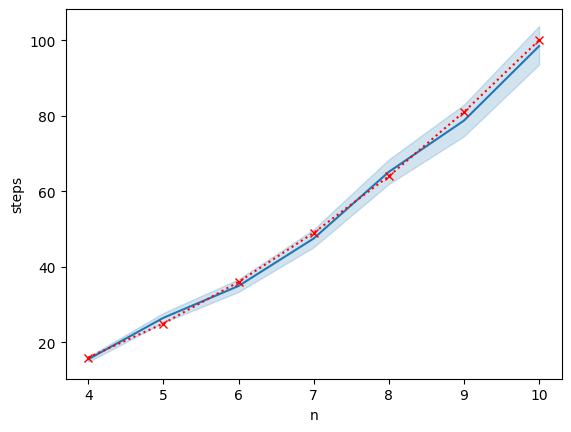

In [ ]:
# What is the microscopic results for values of n
sns.lineplot(data=data, x='n', y="steps")
plt.plot(n, n**2, ":xr")

In [ ]:
# summarize: barplot

In [ ]:
# summarize: histplot

In [ ]:
# summarize try other plots boxenplot, violinplot

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>